# Brief introduction to Python - Part 2

Code cells are run by pressing shift-enter or using the play button in the toolbar.

## NumPy
NumPy is the fundamental package for scientific computing with Python. It provides a high-performance multidimensional array object, and tools for working with these arrays.

This brief introduction to NumPy is mostly from [Stanford cs231n's NumPy Tutorial](https://cs231n.github.io/python-numpy-tutorial/).

Library documentation: https://numpy.org/doc/stable/

### Arrays

To use NumPy, we first need to import the numpy package

In [44]:
import numpy as np

Initialize numpy arrays

In [ ]:
# Initialize an 1D array (vector) using a list as the argument
a = np.array([1, 2, 3])

print(a)
print(type(a), a[0], a[1], a[2])
print(a.shape, a.ndim)

a[0] = 5                 # Change an element of the array
print(a)

In [ ]:
# Initialize a 2D array using a nested list as the argument
b = np.array([ [1, 2, 3], [4, 5, 6] ])

print(b)
print(type(b), b.shape, b.ndim)
print(b[0, 0], b[0, 1], b[1, 0])

b[0, 1] = 10           # Change an element of the array
print(b)

In [ ]:
# Initialize a 3D array using a nested list as the argument
c = np.array([ [ [1, 2], [3, 4], [5, 6] ], [ [7, 8], [9, 10], [11, 12] ] ])

print(c)
print(c.shape, c.ndim)

In [ ]:
c[1, 2, 0]

Numpy also provides many functions to create arrays:

In [ ]:
# Create an array of all zeros
a = np.zeros((2, 2))
print(a)

In [ ]:
# Create an array of all ones
b = np.ones((1, 2))   
print(b, b.ndim)

In [ ]:
# Create a constant array
c = np.full((2, 3), 5) 
print(c)

In [ ]:
# Create a 4x4 identity matrix
d = np.eye(4)        
print(d)

In [ ]:
# Create a diagonal matrix
e = np.diag([1, 2, 3])
print(e)

In [ ]:
# Create an array filled with random values from a uniform distribution
# over the interval [0, 1)
f = np.random.rand(4, 3)
print(f)

In [ ]:
# Create an array filled with random values from a normal distribution
# with mean 0, standard deviation 1
g = np.random.randn(4, 3)
print(g)

In [ ]:
# Array with evenly spaced values within a given interval.
# arguments: start, stop, step
h = np.arange(0, 10, 1).reshape(5, 2)
print(h)

In [ ]:
# Array with evenly spaced values over a specified interval
# arguments: start, stop, number of points
i = np.linspace(0, 10, 20)
print(i)
print(i.shape)

In [ ]:
# Array with evenly spaced values over a specified interval
# arguments: start, stop, number of points
# Excludint the endpoint
i = np.linspace(0, 10, 20, endpoint=False)
print(i)
print(i.shape)

In [ ]:
# Array with evenly spaced values over a specified interval
# arguments: start, stop, number of points
# Return step
arr, step = np.linspace(0, 10, 20, retstep=True)
print(arr, step)

arr, step = np.linspace(0, 10, 20, endpoint=False, retstep=True)
print(arr, step)

### Array indexing
Numpy offers several ways to index into arrays.

**Slicing**: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [ ]:
# Create the following 2D array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print(a)

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

A slice of an array is a **view** into the same data, so modifying it will modify the original array.

In [ ]:
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a) 

Two ways of accessing the data in the middle row of the array. Mixing integer indexing with slices yields an array of lower dimension, while using only slices yields an array of the same dimension as the original array:

In [ ]:
# Create the following 2D array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print(a)

row_1d = a[1, :]
row_2d = a[1:2, :]
print(row_1d, row_1d.shape)
print(row_2d, row_2d.shape)

In [ ]:
# We can make the same distinction when accessing columns of an array:
col_1d = a[:, 1]
col_2d = a[:, 1:2]
print(col_1d, col_1d.shape)
print(col_2d, col_2d.shape)

**Integer array indexing**: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. 

In [ ]:
a = np.array([[1, 2], [3, 4], [5, 6]])
print(a, '\n')

# Examples of integer array indexing.
print(a[[0, 2]], '\n')    # This is the same as print(a[[0, 2], :])

# The returned array will have shape (3,)
print(a[[0, 1, 2], [0, 1, 0]], '\n')

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
print(a, '\n')

# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b]) # a[[0, 1, 2, 3], [0, 2, 0, 1]]

In [ ]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print(a)

**Boolean array indexing**: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. 

In [ ]:
a = np.array([[1, 2], [3, 4], [5, 6]])
print(a, '\n')

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the
                    # same shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.
print(bool_idx)

In [ ]:
# We use boolean array indexing to construct a 1D array consisting of
# the elements of a corresponding to the True values of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

### Array math
Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy:

In [ ]:
np.set_printoptions(precision=2)

x = np.array([[1, 2], [3, 4]], dtype=np.float64)
y = np.array([[5, 6], [7, 8]], dtype=np.float64)
print('x = \n', x, '\n')
print('y =\n', y, '\n')

# Elementwise sum; both produce the array
print('x + y = \n', x + y)
print('x + y = \n', np.add(x, y))
print()

# Elementwise difference
print('x - y = \n', x - y)
print('x - y = \n', np.subtract(x, y))
print()

# Elementwise product
print('x * y = \n', x * y)
print('x * y = \n', np.multiply(x, y))
print()

# Elementwise division
print('x / y = \n', x / y)
print('x / y = \n', np.divide(x, y))
print()

# Elementwise square root
print('x ** 2 = \n', np.sqrt(x))

Note that `*` is elementwise multiplication, not matrix multiplication. We instead use the `dot` function to compute inner products of vectors, and perform matrix multiplications for 2d arrays. `matmul` or `@` operator is also used to multiply matrices. `dot` is available both as a function in the numpy and as an instance method of array objects:

In [ ]:
x = np.array([[1, 2], [3, 4]])
y = np.array([[5, 6], [7, 8]])

v = np.array([1, 1])
w = np.array([0, 2])

# Inner product of vectors
print(v.dot(w))
print(np.dot(v, w))
print()

# Matrix / vector product
print(x @ v)
print(np.matmul(x, v))
print()
print(v @ x)
print(np.matmul(v, x))
print()

# Matrix / matrix product
print(x @ y)
print(np.matmul(x, y))
print()
print(np.matmul(y, x))

Numpy provides many useful functions for performing computations on arrays. For example:

In [ ]:
x = np.array([[1, 2], [3, 4]])
print(x, '\n')

# use axis parameter to specify how function behaves
print(np.sum(x))  # Compute sum of all elements
print(np.sum(x, axis=0))  # Compute sum of each column
print(np.sum(x, axis=1))  # Compute sum of each row
print()

print(np.min(x))  # Find minimum of all elements
print(np.min(x, axis=0))  # Find minimum of each column
print(np.min(x, axis=1))  # Find minimum of each row
print()

print(np.mean(x))  # Compute mean of all elements
print(np.mean(x, axis=0))  # Compute mean of each column
print(np.mean(x, axis=1))  # Compute mean of each row

You can find the full list of mathematical functions provided by numpy in the [documentation](https://numpy.org/doc/stable/reference/routines.math.html).

### Broadcasting
Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

Below are some examples from [NumPy documentaiton on broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html).

```
A      (2d array):  5 x 4
B      (1d array):      1
Result (2d array):  5 x 4

A      (2d array):  5 x 4
B      (1d array):      4
Result (2d array):  5 x 4

A      (3d array):  15 x 3 x 5
B      (3d array):  15 x 1 x 5
Result (3d array):  15 x 3 x 5

A      (3d array):  15 x 3 x 5
B      (2d array):       3 x 5
Result (3d array):  15 x 3 x 5

A      (3d array):  15 x 3 x 5
B      (2d array):       3 x 1
Result (3d array):  15 x 3 x 5
```

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [ ]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print('x = \n', x, '\n')
print('v = \n', v, '\n')
print('y = \n', y)

This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector `v` to each row of the matrix `x` is equivalent to forming a matrix `w` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `w`. We could implement this approach like this:

In [ ]:
w = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print(w, '\n')

y = x + w  # Add x and w elementwise
print(y)

Numpy broadcasting allows us to perform this computation without actually creating multiple copies of `v`. Consider this version, using broadcasting:

In [ ]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)

In [ ]:
# Add a vector to each column of a matrix.
# x has shape (2, 3) and v has shape (2,).
x = np.array([[1, 2, 3], [4, 5, 6]])
v = np.array([1, 2])
x + v

In [ ]:
# Add a vector to each column of a matrix.
# x has shape (2, 3) and v has shape (2,).
x = np.array([[1, 2, 3], [4, 5, 6]])
v = np.array([1, 2])

# We can reshape v to be a vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same output.
print(np.reshape(v, (2, 1)))
print(x + np.reshape(v, (2, 1)))

# Here is another way without using reshape().
# np.newaxis often used to increase the dimensions of an array for operations 
# like broadcasting or to prepare arrays for certain mathematical operations.
print(x + v[:, np.newaxis])    # add a new axis -> 2D array

In [ ]:
print(x + v[np.newaxis, :]) 

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](https://numpy.org/doc/stable/reference/) to find out much more about numpy.

## Matplotlib
Matplotlib is a python 2D plotting library. This is a very brief introduction to the matplotlib.pyplot module adapted from [Stanford cs231n's NumPy Tutorial](https://cs231n.github.io/python-numpy-tutorial/).

Library documentation: http://matplotlib.org/

In [40]:
import matplotlib.pyplot as plt

### SImple plotting
The most important function in matplotlib is `plot`, which allows you to plot 2D data. Here is a simple example:

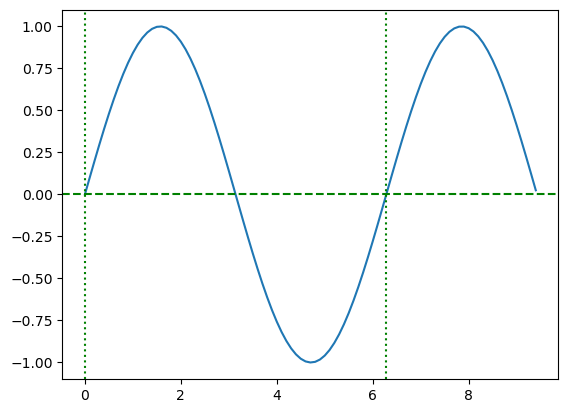

In [46]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

plt.axhline(y=0, color='g', linestyle='--')
plt.axvline(x=2 * np.pi, color='g', linestyle=':')
plt.axvline(x=0 * np.pi, color='g', linestyle=':')

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

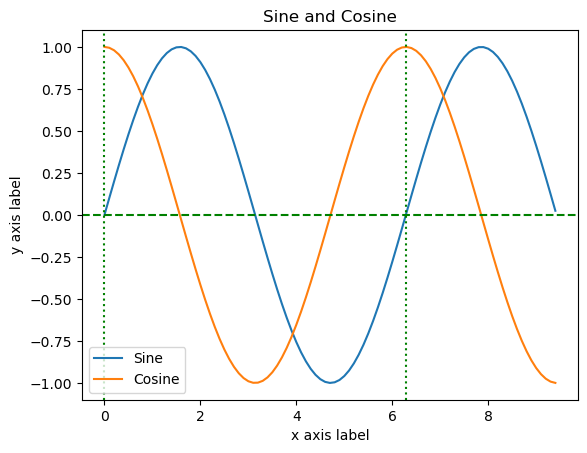

In [48]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin, label='Sine')
plt.plot(x, y_cos, label='Cosine')
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend()

plt.axhline(y=0, color='g', linestyle='--')
plt.axvline(x=2 * np.pi, color='g', linestyle=':')
plt.axvline(x=0 * np.pi, color='g', linestyle=':')

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label', fontsize=13)
plt.ylabel('y axis label', fontsize=13)
plt.title('Sine and Cosine', fontsize=16)
plt.legend(['Sine', 'Cosine'])

### Subplots
You can plot different things in the same figure using the `subplot` function. Here is an example:

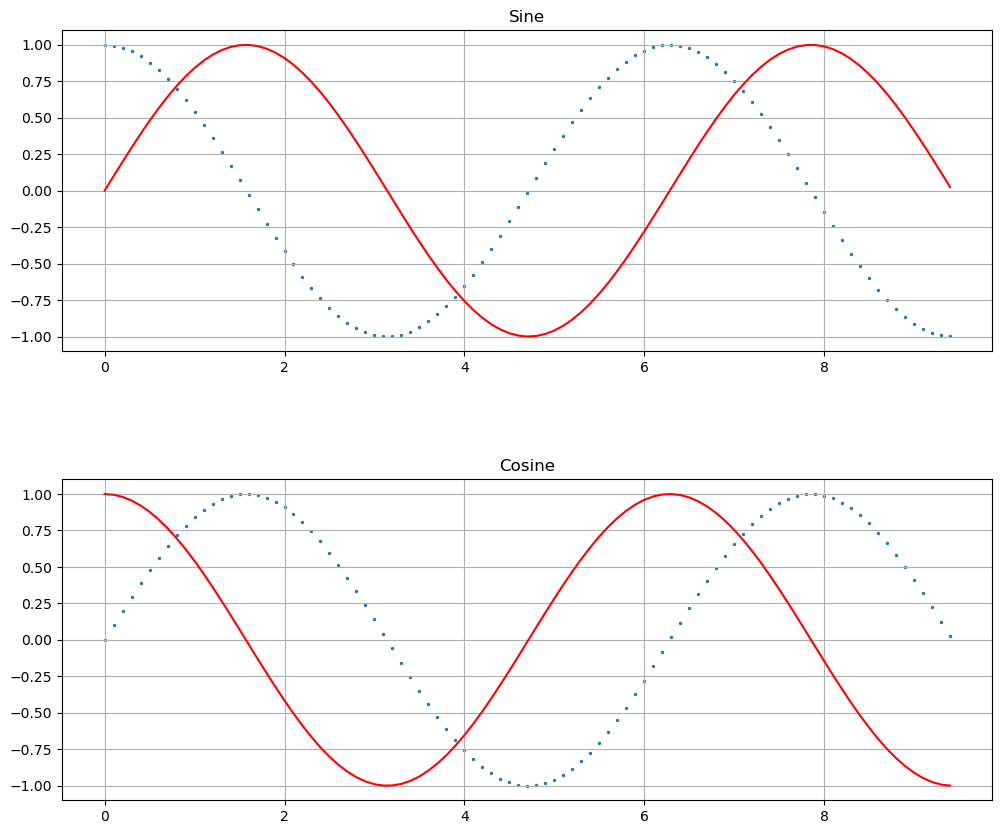

In [50]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

plt.figure(figsize=(12, 10))

# Set up a subplot grid that has 2 rows and 1 column,
# and set the first such subplot as active. Then make the first plot.
plt.subplot(2, 1, 1)
plt.plot(x, y_sin, c='r')
plt.scatter(x, y_cos, s=2)
plt.title('Sine')
plt.grid()

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos, c='r')
plt.scatter(x, y_sin, s=2)
plt.title('Cosine')
plt.grid()

plt.subplots_adjust(hspace=0.4)

# Show the figure.
plt.show()

You can read much more about the matplotlib.pyplot module in the [documentation](https://matplotlib.org/stable/api/pyplot_summary.html).

## Pandas
Pandas is a great data analysis and manipulation library for tabular data. 

Library documentation: https://pandas.pydata.org/docs/

In [14]:
import pandas as pd

### Reading data from CSV files

In [16]:
census = pd.read_csv("adult.csv")
print(census.shape)

(32561, 15)


In [18]:
census.head()    # show first 5 rows in the data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [20]:
# Get a quick description of the data
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [22]:
# Summary of the numerical attributes
census.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [24]:
# Summary of selected column(s)
census[['age', 'capital.loss']].describe()

,age,capital.loss
count,32561.000000,32561.000000
mean,38.581647,87.303830
std,13.640433,402.960219
min,17.000000,0.000000
25%,28.000000,0.000000
50%,37.000000,0.000000
75%,48.000000,0.000000
max,90.000000,4356.000000


In [26]:
# Summary on categorical attribute.
# - row count, # of unique categories, most frequent category and the frequency
census['education'].describe()

count       32561
unique         16
top       HS-grad
freq        10501
Name: education, dtype: object

In [28]:
# count the number of occurrences of unique values
census['education'].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

### Selection, extraction, slicing

In [30]:
data = census[:10]

In [32]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


Columns can be selected and filtered based on values and names.

In [ ]:
data[['age', 'occupation']]

In [62]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [104]:
data[(data['age'] > 40) & (data['workclass'] != '?')]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [72]:
print(data.loc[2], '\n')     # locate by name (or label)
print(data.iloc[-1])         # locate by numerical index

age                          66
workclass                     ?
fnlwgt                   186061
education          Some-college
education.num                10
marital.status          Widowed
occupation                    ?
relationship          Unmarried
race                      Black
sex                      Female
capital.gain                  0
capital.loss               4356
hours.per.week               40
native.country    United-States
income                    <=50K
Name: 2, dtype: object 

age                          41
workclass               Private
fnlwgt                    70037
education          Some-college
education.num                10
marital.status    Never-married
occupation         Craft-repair
relationship          Unmarried
race                      White
sex                        Male
capital.gain                  0
capital.loss               3004
hours.per.week               60
native.country                ?
income                     >50K
Name: 9, dtype:

In [ ]:
data.loc[2:5]

In [ ]:
data.loc[:, 'age':'education']

In [ ]:
data.iloc[2:5]

In [52]:
data.iloc[:, 0:4]

,age,workclass,fnlwgt,education
0,90,?,77053,HS-grad
1,82,Private,132870,HS-grad
2,66,?,186061,Some-college
3,54,Private,140359,7th-8th
4,41,Private,264663,Some-college
5,34,Private,216864,HS-grad
6,38,Private,150601,10th
7,74,State-gov,88638,Doctorate
8,68,Federal-gov,422013,HS-grad
9,41,Private,70037,Some-college


### Create DataFrame

Create dataframe using dictionary. It supports whether the dictionaly keys are row or column indices.

In [10]:
data_dict = {'A': [3, 2, 1, 0],
        'B': ['a', 'b', 'c', 'd']}

df = pd.DataFrame.from_dict(data_dict)
df

,A,B
0,3,a
1,2,b
2,1,c
3,0,d


In [12]:
df = pd.DataFrame.from_dict(data_dict, orient='index')
df

,0,1,2,3
A,3,2,1,0
B,a,b,c,d


Create dataframe from 2D array. You can name the rows and columns.

In [ ]:
data_arr = np.array([i for i in range(10)]).reshape(2, 5)

df = pd.DataFrame(data_arr)
df

In [ ]:
df = pd.DataFrame(data_arr, index=['row 1', 'row 2'],
                  columns=[f'col {i + 1}' for i in range(5)],)
df